## 读数据

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 

In [2]:
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件1.xls')
df.head()

df = df.drop(6329)
df['y'] = df['y'].astype('float')
X = df.loc[:,'x1':'x6']
y = df.loc[:,'y']

In [3]:
print('y为0:' + str(sum(df['y']==0)))
print('y为1:' + str(sum(df['y']==1)))

y为0:1380
y为1:4949


# 归一化

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
X_standard

array([[ 0.2758816 ,  0.2835792 , -1.43131103, -0.85056771, -1.96679011,
        -0.93448911],
       [ 0.06160444, -0.84846385,  0.69866017,  0.98670839,  0.08042178,
         1.25440119],
       [-1.45866856, -1.05893072,  0.69866017,  0.20350486, -0.14463131,
         1.25440119],
       ...,
       [-0.10418665,  0.69913931,  0.69866017, -0.4941611 , -0.62698808,
        -0.93448911],
       [ 1.11578551, -0.60127724, -1.43131103, -0.71156913,  0.82358774,
        -0.93448911],
       [-1.2279687 ,  0.4537439 ,  0.69866017,  1.82069987, -0.69008708,
         1.25440119]])

## 随机逻辑回归

#### 算出可以使用的参数

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

In [6]:
rlr = RLR()
rlr.fit(X_standard,y)

## 算出使用的参数
rlr.get_support()

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


array([ True, False, False, False, False,  True])

#### 随机逻辑回归中各个列的得分  并且绘图

In [7]:
rlr.scores_

array([0.64 , 0.   , 0.08 , 0.   , 0.175, 0.755])

Text(0,0.5,'得分')

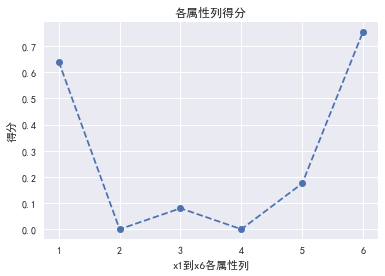

In [8]:
coef_df = DataFrame(rlr.scores_.T, index=[1,2,3,4,5,6])
coef_df.plot(linestyle='--', marker='o',legend=False,title='各属性列得分')
plt.xlabel('x1到x6各属性列')
plt.ylabel('得分')

## 算出拟合直线的系数和截距

In [9]:
lr = LR()
lr.fit(X_standard, y)
lr.coef_

array([[ 0.2165999 , -0.00469497,  0.07356338,  0.01788357,  0.02752559,
         0.23685714]])

In [10]:
lr.coef_

array([[ 0.2165999 , -0.00469497,  0.07356338,  0.01788357,  0.02752559,
         0.23685714]])

In [11]:
lr.intercept_

array([1.30104433])

## 绘图

#### 系数的可视化

Text(0,0.5,'系数')

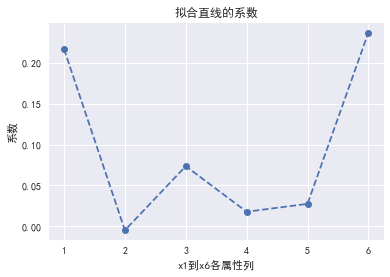

In [12]:
coef_df = DataFrame(lr.coef_.T, index=[1,2,3,4,5,6])
coef_df.plot(linestyle='--', marker='o',legend=False,title='拟合直线的系数')
plt.xlabel('x1到x6各属性列')
plt.ylabel('系数')

# 第二题分类归一化

#### 使用pearson系数

In [13]:
g = df.groupby(df['x6'])
list(g)

[(1,       Number    y     x1     x2  x3      x4        x5  x6
  0          1  0.0  63.91  50.34   0  0.3662  0.348837   1
  3          4  1.0  67.90  28.41   1  0.5242  0.941395   1
  6          7  1.0  75.15  48.05   0  0.6479  0.093023   1
  8          9  1.0  77.89  48.48   1  0.3685  1.024419   1
  12        13  0.0  26.59  50.12   0  0.5494  1.062326   1
  14        15  1.0  77.89  32.39   1  0.3685  1.160000   1
  17        18  0.0  68.40  61.81   0  0.3380  0.209302   1
  18        19  1.0  74.54  30.82   1  0.4357  1.237674   1
  25        26  1.0  70.65  43.46   0  0.3380  0.255814   1
  38        39  0.0  61.26  54.98   1  0.4357  0.941395   1
  40        41  1.0  41.35  57.39   1  0.1997  1.237674   1
  41        42  1.0  75.15  38.88   0  0.2817  0.093023   1
  43        44  1.0  73.34  39.29   1  0.3941  1.634651   1
  44        45  1.0  70.65  50.34   0  0.3380  0.069767   1
  47        48  1.0  66.12  59.48   1  0.2578  1.191628   1
  48        49  0.0  50.20  57.39   1

In [14]:
for i, new_df in list(g):
    X_new = new_df.loc[:,'x1':'x5']
    y_new = new_df.loc[:,'y']
    standardScaler = StandardScaler()
    standardScaler.fit(X_new)
    X_new_standard = standardScaler.transform(X_new)
    # 使用pearson系数
    print(DataFrame(X_new_standard,columns=['x1','x2','x3','x4','x5']).corr(method='pearson'))
    rlr = RLR()
    rlr.fit(X_new_standard,y_new)
    print(rlr.scores_)
    print(rlr.get_support())

          x1        x2        x3        x4        x5
x1  1.000000 -0.200168 -0.007270 -0.297410  0.063384
x2 -0.200168  1.000000  0.083215 -0.060647  0.025960
x3 -0.007270  0.083215  1.000000 -0.063728  0.573023
x4 -0.297410 -0.060647 -0.063728  1.000000 -0.230550
x5  0.063384  0.025960  0.573023 -0.230550  1.000000


D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


[1.    0.    0.015 0.025 0.   ]
[ True False False False False]
          x1        x2        x3        x4        x5
x1  1.000000 -0.143111 -0.067962 -0.293818  0.216074
x2 -0.143111  1.000000  0.047956 -0.001082 -0.047577
x3 -0.067962  0.047956  1.000000  0.106185  0.007892
x4 -0.293818 -0.001082  0.106185  1.000000 -0.417823
x5  0.216074 -0.047577  0.007892 -0.417823  1.000000


D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


[0.01 0.   0.   0.   0.  ]
[False False False False False]
          x1        x2        x3        x4        x5
x1  1.000000 -0.150762 -0.006625 -0.285676  0.103130
x2 -0.150762  1.000000 -0.028559 -0.029349 -0.041039
x3 -0.006625 -0.028559  1.000000  0.175648  0.047032
x4 -0.285676 -0.029349  0.175648  1.000000 -0.468116
x5  0.103130 -0.041039  0.047032 -0.468116  1.000000


D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


[0. 0. 0. 0. 0.]
[False False False False False]
          x1        x2        x3        x4        x5
x1  1.000000 -0.159447 -0.136715 -0.345955  0.151855
x2 -0.159447  1.000000  0.093284  0.035458 -0.096392
x3 -0.136715  0.093284  1.000000 -0.054302 -0.063971
x4 -0.345955  0.035458 -0.054302  1.000000 -0.577849
x5  0.151855 -0.096392 -0.063971 -0.577849  1.000000


D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


[0. 0. 0. 0. 0.]
[False False False False False]


## 随机分离预测保留x1,x6时的正确率

In [15]:
# 保留x1和x6
X = df[['x1','x6']]
y = df['y']

In [16]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
lr = LR()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 随机正确率  在78%左右

In [19]:
lr.score(X_test, y_test)

0.7732154137713203

In [20]:
print('预测y为0:' + str(sum(lr.predict(X_test)==0)))
print('预测y为1:' + str(sum(lr.predict(X_test)==1)))

预测y为0:10
预测y为1:1573


In [21]:
sum(lr.predict(X_test)==1)

1573

# 预测附件2

## 训练模型

In [22]:
# 对附件1留下x1和x6并且归一化
X = df[['x1','x6']]
y = df['y']

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [23]:
lr = LR()
lr.fit(X_standard, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 绘图附件一归一化后的分布图

In [24]:
print(X_standard[:,0].max())
print(X_standard[:,0].min())
print(X_standard[:,1].max())
print(X_standard[:,1].min())

1.8563711790854531
-4.722094097241862
2.3488463335677925
-0.934489110402735


In [25]:
## 绘制直线
def x2(x1):
    return(-lr.coef_[0][0] * x1 - lr.intercept_) / lr.coef_[0][1]

In [26]:
x_plot = np.linspace(-5,3,10000)
y_plot = x2(x_plot)

Text(0.5,1,'样本')

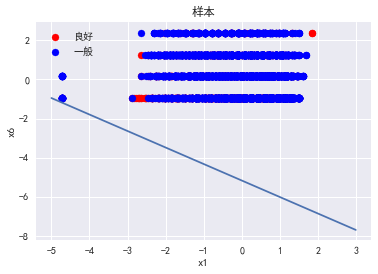

In [27]:
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red', label='良好') 
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue', label='一般') 
plt.plot(x_plot, y_plot) 
plt.xlabel('x1')
plt.ylabel('x6')
plt.legend() 
plt.title("样本")

## 用附件一训练的模型预测附件二预测附件2

In [28]:
# 读数据并保留x1,x6并且归一化处理
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件2.xlsx')

X = df[['x1','x6']]



# 归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
X_standard

array([[ 0.45367371, -0.82375447],
       [-0.03627327, -0.82375447],
       [-0.15304396,  0.82375447],
       [ 0.63413751, -0.82375447],
       [ 0.25687834,  0.82375447],
       [ 0.67496642,  1.64750894],
       [ 0.43325925,  1.64750894],
       [-1.3403488 , -0.82375447],
       [-2.08098531,  0.        ],
       [ 1.04569297, -0.82375447],
       [ 0.77050608, -0.82375447],
       [ 0.99588169, -0.82375447],
       [ 0.25687834,  1.64750894],
       [-1.58695544, -0.82375447],
       [-0.40128376, -0.82375447],
       [-0.87571575,  0.        ],
       [-1.50693077,  1.64750894],
       [ 1.08162241,  0.        ],
       [ 1.37804033, -0.82375447]])

#### 预测结果

In [29]:
y_pre = lr.predict(X_standard)
print(y_pre)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 绘图

In [30]:
x_plot = np.linspace(-2.5,2,100)
y_plot = x2(x_plot)

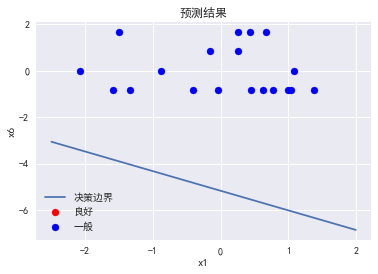

In [31]:
plt.scatter(X_standard[y_pre==0, 0], X_standard[y_pre==0, 1], color='red', label='良好') 
plt.scatter(X_standard[y_pre==1, 0], X_standard[y_pre==1, 1], color='blue', label='一般') 
plt.plot(x_plot, y_plot, label='决策边界') 
plt.legend() 
plt.xlabel('x1')
plt.ylabel('x6')
plt.title("预测结果")
plt.show()